In [437]:
import numpy as np
import pandas as pd

In [438]:
df = pd.read_csv("D:\\New folder\spam.csv")
                 

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\arpit\AppData\Local\Temp\ipykernel_16976\87607850.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("D:\\New folder\spam.csv")


In [439]:
df.sample(10)

,Unnamed: 0,spamORham,Message
84,84,ham,Yup next stop.
4634,4634,ham,How come i din c Ì_... Yup i cut my hair...
1126,1126,ham,Not tonight mate. Catching up on some sleep. T...
1642,1642,ham,Sleeping nt feeling well
3759,3759,ham,We'll join the &lt;#&gt; bus
2710,2710,spam,Hope you enjoyed your new content. text stop t...
4255,4255,ham,Aah! A cuddle would be lush! I'd need lots of ...
2576,2576,ham,In sch but neva mind u eat 1st lor..
5037,5037,ham,Thanks for being there for me just to talk to ...
499,499,ham,Dear i have reache room


In [440]:
df.shape

(5572, 3)

In [441]:
df.info

<bound method DataFrame.info of       Unnamed: 0 spamORham                                            Message
0              0       ham  Go until jurong point, crazy.. Available only ...
1              1       ham                      Ok lar... Joking wif u oni...
2              2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3              3       ham  U dun say so early hor... U c already then say...
4              4       ham  Nah I don't think he goes to usf, he lives aro...
...          ...       ...                                                ...
5567        5567      spam  This is the 2nd time we have tried 2 contact u...
5568        5568       ham              Will Ì_ b going to esplanade fr home?
5569        5569       ham  Pity, * was in mood for that. So...any other s...
5570        5570       ham  The guy did some bitching but I acted like i'd...
5571        5571       ham                         Rofl. Its true to its name

[5572 rows x 3 columns]>

In [442]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [443]:
df.sample(10)


,spamORham,Message
3558,spam,URGENT! We are trying to contact U Todays draw...
2165,ham,I'm not coming home 4 dinner.
4539,ham,"Urgh, coach hot, smells of chip fat! Thanks ag..."
3750,ham,"Haha... Sounds crazy, dunno can tahan anot..."
499,ham,Dear i have reache room
1928,spam,Call from 08702490080 - tells u 2 call 0906635...
3299,ham,Just do what ever is easier for you
3432,ham,Christmas is An occasion that is Celebrated as...
3343,ham,Oh great. I.ll disturb him more so that we can...
4023,ham,Wat time Ì_ wan today?


In [444]:
df.rename(columns={'spamORham':'target','Message':'text'},inplace=True)
df.sample(10)

,target,text
1903,spam,Free entry in 2 a weekly comp for a chance to ...
3039,ham,One day a crab was running on the sea shore..T...
1315,ham,"Whenevr ur sad, Whenevr ur gray, Remembr im he..."
3339,ham,Like I made him throw up when we were smoking ...
3241,ham,Good Morning my Dear........... Have a great &...
4687,ham,Hmmm.but you should give it on one day..
1723,ham,"Hi Jon, Pete here, Ive bin 2 Spain recently & ..."
1508,ham,Sounds like something that someone testing me ...
1901,ham,"Sorry, I'll call later"
5150,ham,Happy new year to u and ur family...may this n...


In [445]:
df.sample(10)

,target,text
4765,ham,Whens your radio show?
3856,ham,No! But we found a diff farm shop to buy some ...
3766,ham,"Sir Goodmorning, Once free call me."
1485,ham,(I should add that I don't really care and if ...
1390,ham,"I wonder how you got online, my love ? Had you..."
1840,ham,Yeah. I got a list with only u and Joanna if I...
3759,ham,We'll join the &lt;#&gt; bus
1860,ham,"It could work, we'll reach a consensus at the ..."
3860,spam,Free Msg: Ringtone!From: http://tms. widelive....
1833,ham,When should I come over?


In [446]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [447]:
df['target'] = encoder.fit_transform(df['target'])


In [448]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [449]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [450]:
df.duplicated().sum()

403

In [451]:
df = df.drop_duplicates(keep='first')

In [452]:
df.duplicated().sum()


0

In [453]:
df.shape

(5169, 2)

In [454]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [455]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

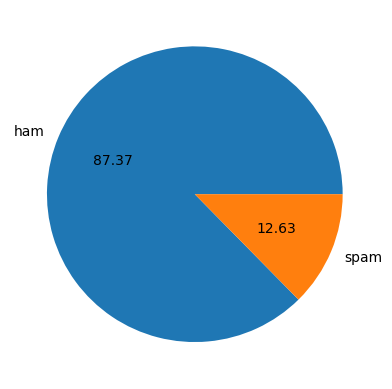

In [456]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [457]:
import nltk


In [458]:
!pip install nltk

In [459]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [460]:
df['num_characters'] = df['text'].apply(len)

C:\Users\arpit\AppData\Local\Temp\ipykernel_16976\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [461]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [462]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\arpit\AppData\Local\Temp\ipykernel_16976\76344806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [463]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [464]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\arpit\AppData\Local\Temp\ipykernel_16976\2446049213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [465]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [466]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [467]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

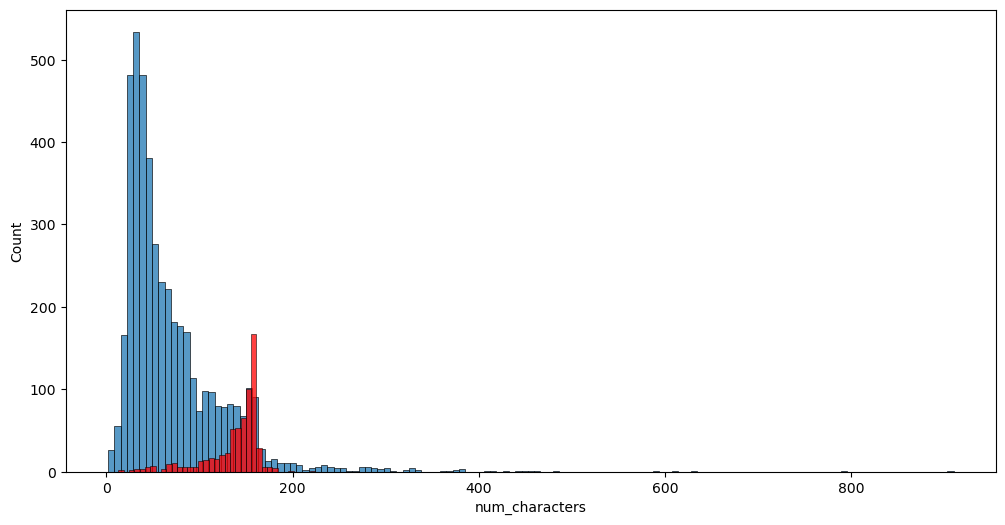

In [468]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

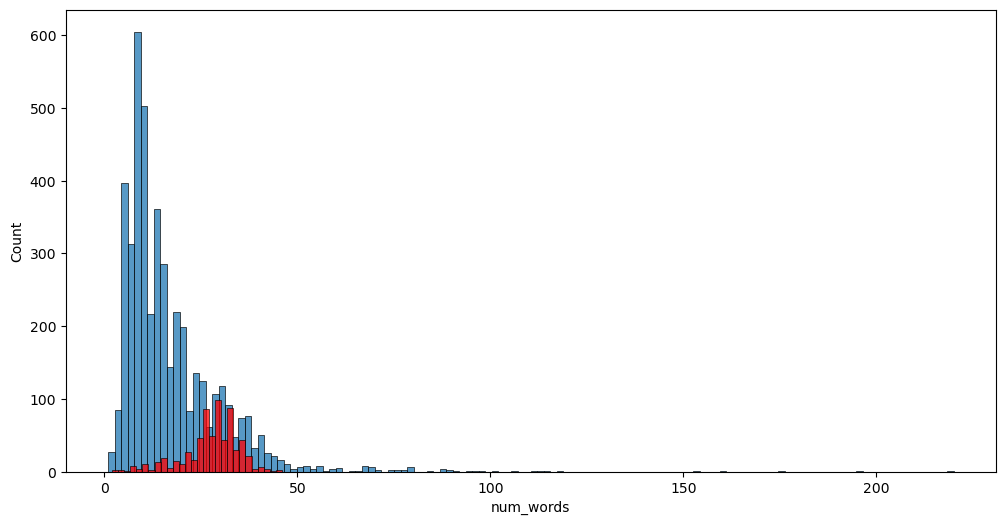

In [469]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')


<Axes: xlabel='num_sentence', ylabel='Count'>

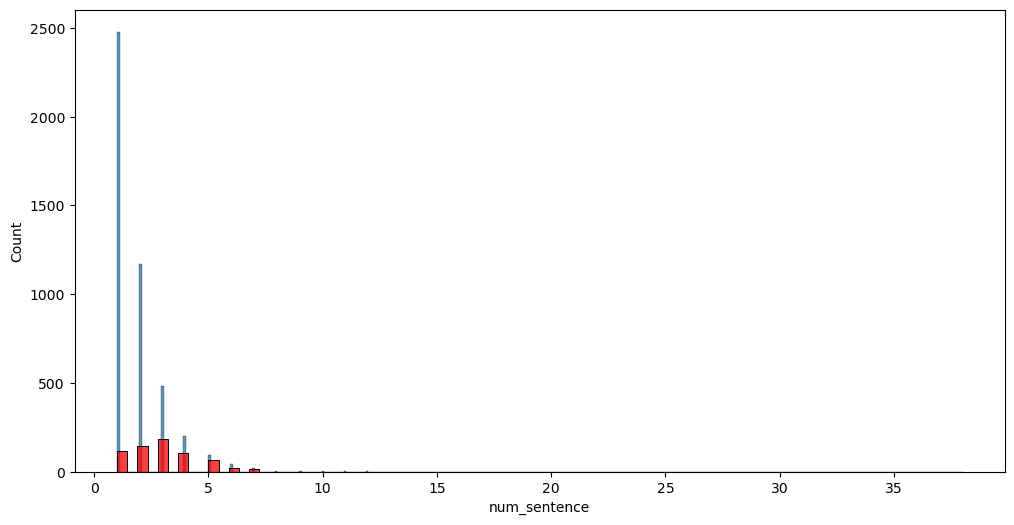

In [470]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentence'])
sns.histplot(df[df['target'] == 1]['num_sentence'],color='red')


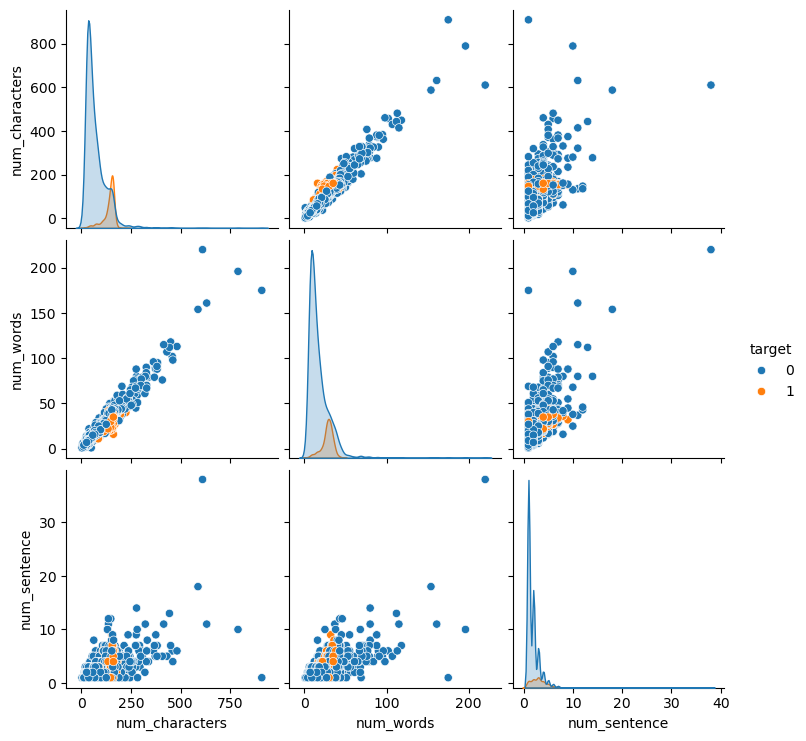

In [471]:
sns.pairplot(df,hue='target')

In [487]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

def transform_text(text):
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

transformed_text = transform_text("what are you doing")

print(transform_text)

<function transform_text at 0x000001354480B2E0>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [489]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [491]:
ps = PorterStemmer()
ps.stem('lovingg')


'lovingg'

In [493]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\arpit\AppData\Local\Temp\ipykernel_16976\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


df.head()

In [495]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [496]:
len(spam_corpus)


10847

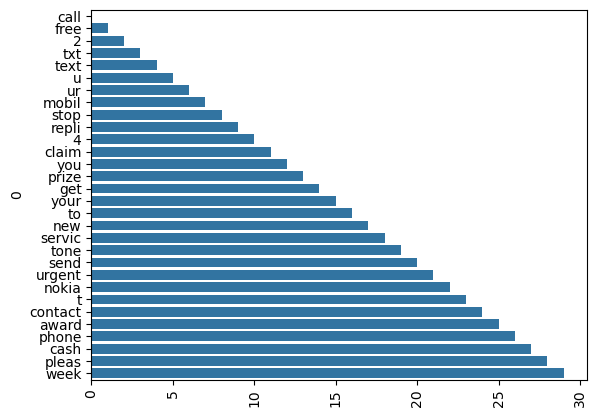

In [497]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],)
plt.xticks(rotation='vertical')
plt.show()

In [498]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [499]:
len(ham_corpus)

40814

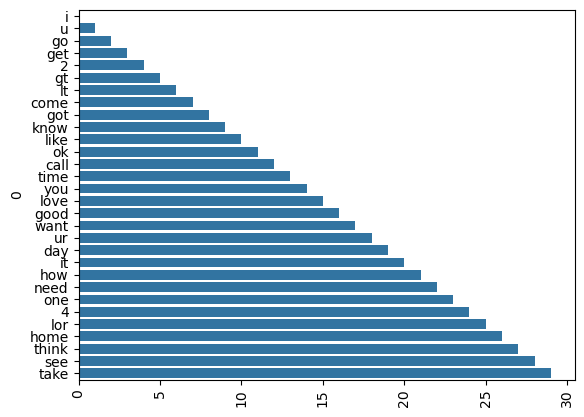

In [500]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],)
plt.xticks(rotation='vertical')
plt.show()

In [501]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i think goe usf live around though


In [502]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [503]:
tfid = TfidfVectorizer(max_features=3000)

In [504]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer() 

In [505]:
X = tfid.fit_transform(df['transformed_text']).toarray()

In [506]:
#X = np.hstack((X,df['num_character'].values.reshape(-1,1)))

In [507]:
X.shape

(5169, 3000)

In [508]:
y = df['target'].values

In [509]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [510]:
from sklearn.model_selection import train_test_split

In [511]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [512]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [513]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [514]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[795 101]
 [ 29 109]]
0.5190476190476191


In [515]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [516]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9845261121856866
[[895   1]
 [ 15 123]]
0.9919354838709677


In [517]:
!pip install xgboost

In [518]:
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [519]:
from sklearn.svm import SVC

In [520]:
svc = SVC(kernel='sigmoid', gamma=1.0)

In [521]:
from sklearn.neighbors import KNeighborsClassifier

In [522]:
knc = KNeighborsClassifier()

In [523]:
from sklearn.naive_bayes import MultinomialNB


In [524]:
mnb = MultinomialNB()

In [525]:
from sklearn.tree import DecisionTreeClassifier 

In [526]:
dtc = DecisionTreeClassifier(max_depth=5)

In [527]:
from sklearn.linear_model import LogisticRegression

In [528]:
lrc = LogisticRegression(solver='liblinear', penalty='11')

In [529]:
from sklearn.ensemble import RandomForestClassifier

In [530]:
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [531]:
from sklearn.ensemble import AdaBoostClassifier 

In [532]:
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [533]:
from sklearn.ensemble import BaggingClassifier

In [534]:
bc = BaggingClassifier(n_estimators=50, random_state=2)

In [535]:
from sklearn.ensemble import ExtraTreesClassifier

In [536]:
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [537]:
from sklearn.ensemble import GradientBoostingClassifier

In [538]:
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

In [539]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [563]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'RF' : rfc,
    'AdaBoost' :abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [564]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [565]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9787234042553191, 0.9915254237288136)

In [566]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9787234042553191
Precision -  0.9915254237288136
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8484848484848485
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9652173913043478


C:\Users\arpit\Downloads\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.8951612903225806
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.872
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9405940594059405
For  xgb
Accuracy -  0.965183752417795
Precision -  0.9322033898305084


In [618]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [620]:
performance_df 

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.974855,1.000000
0,SVC,0.978723,0.991525
7,ETC,0.975822,0.966942
4,RF,0.970019,0.965217
8,GBDT,0.952611,0.940594
9,xgb,0.965184,0.932203
5,AdaBoost,0.961315,0.895161
6,BgC,0.956480,0.872000
3,DT,0.933269,0.848485


In [622]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [624]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.974855
2,SVC,Accuracy,0.978723
3,ETC,Accuracy,0.975822
4,RF,Accuracy,0.970019
5,GBDT,Accuracy,0.952611
6,xgb,Accuracy,0.965184
7,AdaBoost,Accuracy,0.961315
8,BgC,Accuracy,0.956480
9,DT,Accuracy,0.933269


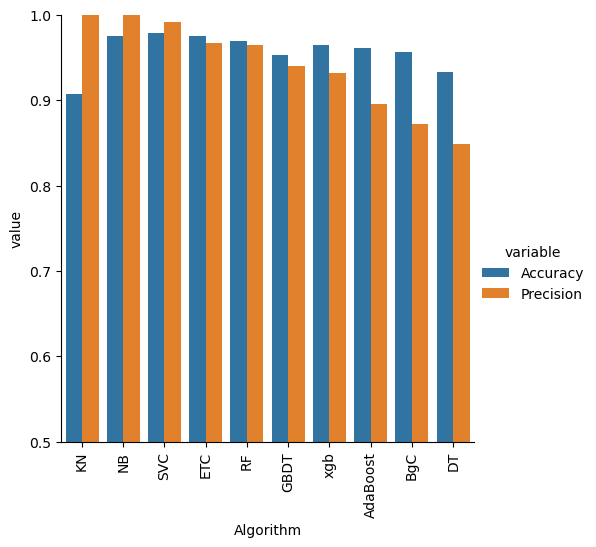

In [626]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [628]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [634]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [636]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,SVC,0.978723,0.991525,0.978723,0.991525,0.978723,0.991525,0.978723,0.991525
3,ETC,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
4,RF,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217,0.970019,0.965217
5,GBDT,0.952611,0.940594,0.952611,0.940594,0.952611,0.940594,0.952611,0.940594
6,xgb,0.965184,0.932203,0.965184,0.932203,0.965184,0.932203,0.965184,0.932203
7,AdaBoost,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161,0.961315,0.895161
8,BgC,0.956480,0.872000,0.956480,0.872000,0.956480,0.872000,0.956480,0.872000
9,DT,0.934236,0.857143,0.934236,0.857143,0.933269,0.848485,0.933269,0.848485


In [638]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [640]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [642]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [643]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [644]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [645]:
from sklearn.ensemble import StackingClassifier

In [646]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [647]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [694]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
pickle.dump(tfidf,open('vectorizer.pkl','wb'))

In [696]:
tfid = TfidfVectorizer(max_features=3000)

In [706]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0]

tfidf = TfidfVectorizer(lowercase=True, stop_words='english') 
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file: 
    pickle.dump(mnb, model_file)